<a href="https://colab.research.google.com/github/KingisFire/GL-TP1/blob/master/Carnava.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import pandas as pd
import numpy as np
from fastai.vision import *
from pathlib import Path 

In [0]:
os.environ["KAGGLE_USERNAME"] = "votre_id"
os.environ["KAGGLE_KEY"] = "votre_clef"
!kaggle competitions download -c carvana-image-masking-challenge

In [0]:
!ls

In [0]:
!unzip -q train.zip

In [0]:
!unzip -q train_masks.csv.zip

In [0]:
!unzip -q train_masks.zip

In [0]:
!ls

In [0]:
data_path = Path('/content')

In [0]:
get_y_fn = lambda x: data_path/f'train_masks/{x.stem}_mask.gif'

In [0]:
data = (SegmentationItemList.from_folder(data_path/'train')
        .split_by_rand_pct()
        .label_from_func(get_y_fn, classes=[0, 1])
        .transform(get_transforms(), tfm_y=True, size=64)
        .databunch())

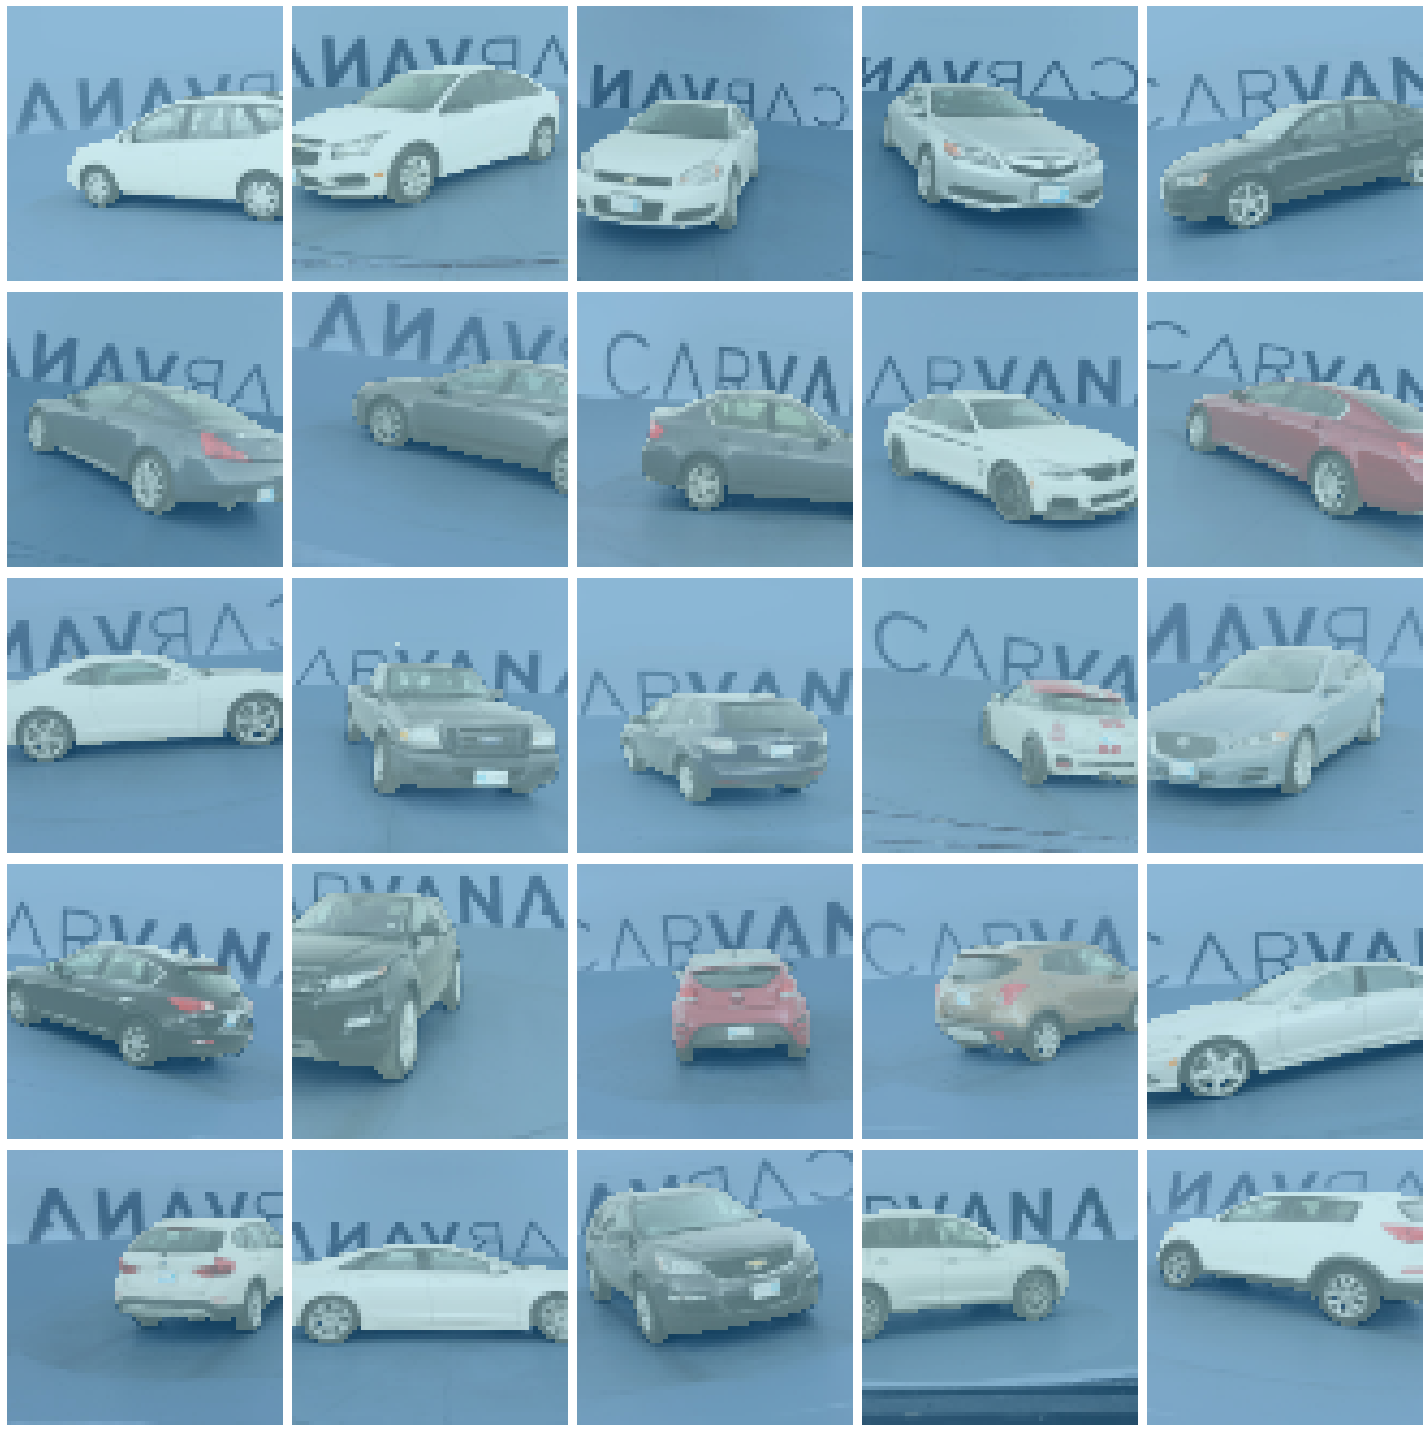

In [0]:
data.show_batch()

In [0]:
print(data)

ImageDataBunch;

Train: LabelList (4071 items)
x: SegmentationItemList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: SegmentationLabelList
ImageSegment (1, 64, 64),ImageSegment (1, 64, 64),ImageSegment (1, 64, 64),ImageSegment (1, 64, 64),ImageSegment (1, 64, 64)
Path: /content/train;

Valid: LabelList (1017 items)
x: SegmentationItemList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: SegmentationLabelList
ImageSegment (1, 64, 64),ImageSegment (1, 64, 64),ImageSegment (1, 64, 64),ImageSegment (1, 64, 64),ImageSegment (1, 64, 64)
Path: /content/train;

Test: None


In [0]:
mask_list = data.train_ds.y
print(mask_list[0].data)

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]]])


In [0]:
# Après : learner = unet_learner(data, models.resnet18, )